In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
from sklearn.model_selection import train_test_split

In [11]:
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]

In [2]:
mnist = pd.read_csv('mnist_test.csv')
mnist.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
X = mnist.drop(columns='label')
y = mnist.label

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings
sort_by_target(mnist) # fetch_openml() returns an unsorted dataset
mnist["data"], mnist["target"]

In [3]:
def get_data():
    """
    Get MNIST data ready to learn with.

    Returns
    -------
    dict
        With keys 'train' and 'test'. Both do have the keys 'X' (features)
        and'y' (labels)
    """
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')

    X = mnist.data
    y = mnist.target

    # Scale data to [-1, 1] - This is of mayor importance!!!
    x = x/255.0*2 - 1

    from sklearn.cross_validation import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.33,
                                                        random_state=42)
    data = {'train': {'X': x_train,
                      'y': y_train},
            'test': {'X': x_test,
                     'y': y_test}}
    return data

In [4]:
mnist.shape

(10000, 785)

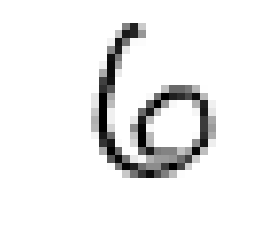

In [5]:
some_digit = X.iloc[100].values
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()

In [6]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

In [7]:
y[100]

6

In [8]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

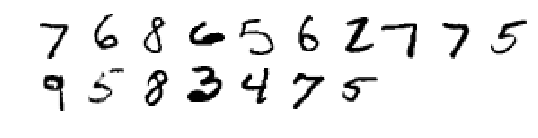

In [9]:
plt.figure(figsize=(9,9))
example_images = np.r_[X[:10000:600], X[10000:9000:600], X[10000:9000:590]]
plot_digits(example_images, images_per_row=10)
plt.show()

In [33]:
V = np.array([1,2,3,4,5,6 ])
Y = np.array([7,8,9,10,11,12])
print(np.r_[V,Y])
print(np.c_[V,Y])

[ 1  2  3  4  5  6  7  8  9 10 11 12]
[[ 1  7]
 [ 2  8]
 [ 3  9]
 [ 4 10]
 [ 5 11]
 [ 6 12]]


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
shuffle_index = np.random.permutation(5000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [11]:
y_train_6 = (y_train == 6)
y_test_6 = (y_test == 6)

In [12]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)
sgd_clf.fit(X_train, y_train_6)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=-inf, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [13]:
sgd_clf.predict([some_digit])

array([ True])

In [15]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_6, cv=3, scoring="accuracy")

array([0.97314235, 0.97671294, 0.96596507])

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_6):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_6[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_6[test_index])

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

In [17]:
from sklearn.base import BaseEstimator
class Never6Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [18]:
never_6_clf = Never6Classifier()
cross_val_score(never_6_clf, X_train, y_train_6, cv=3, scoring="accuracy")

array([0.90689346, 0.90640394, 0.90461263])

In [20]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_6, cv=3)

In [23]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_6, y_train_pred)

array([[5910,  160],
       [  28,  602]], dtype=int64)

In [24]:
tn, fp, fn, tp = confusion_matrix(y_train_6, y_train_pred).ravel()
print(tn, fp, fn, tp)

5910 160 28 602


In [25]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_6, y_train_pred)

0.7900262467191601

In [27]:
recall_score(y_train_6, y_train_pred)

0.9555555555555556

In [28]:
from sklearn.metrics import f1_score
f1_score(y_train_6, y_train_pred)

0.8649425287356323

In [29]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([1496090.3674776])

In [30]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [31]:
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [32]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_6, cv=3,
                             method="decision_function")

In [33]:
y_scores.shape

(6700,)

In [ ]:
# hack to work around issue #9589 in Scikit-Learn 0.19.0
if y_scores.ndim == 2:
    y_scores = y_scores[:, 1]

In [34]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_6, y_scores)

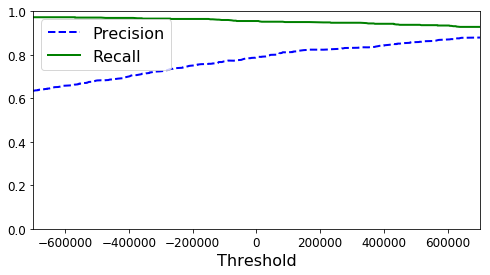

In [35]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])
plt.show()

In [36]:
(y_train_pred == (y_scores > 0)).all()

True

In [38]:
y_train_pred_90 = (y_scores > 70000)
precision_score(y_train_6, y_train_pred_90)

0.8032128514056225

In [39]:
recall_score(y_train_6, y_train_pred_90)

0.9523809523809523

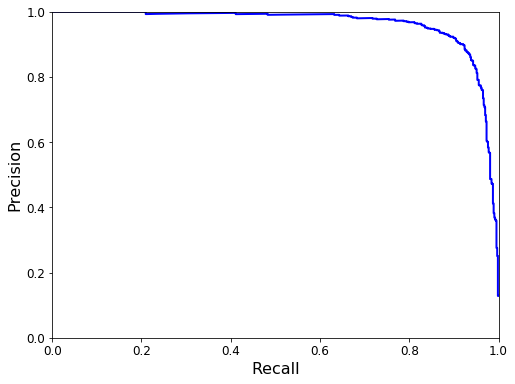

In [40]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)



In [41]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_6, y_scores)

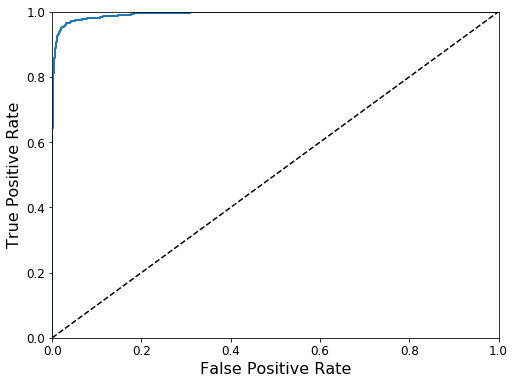

In [42]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)

In [43]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_6, y_scores)

0.9930056745377998

In [45]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=10, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_6, cv=3,
                                    method="predict_proba")

In [47]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_6,y_scores_forest)

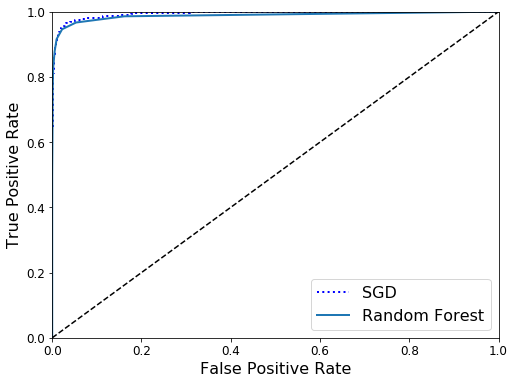

In [48]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right", fontsize=16)

In [49]:
roc_auc_score(y_train_6, y_scores_forest)

0.9876377448288487

In [51]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_6, cv=3)
precision_score(y_train_6, y_train_pred_forest)

0.9756554307116105

In [52]:
recall_score(y_train_6, y_train_pred_forest)

0.8269841269841269

In [53]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([6], dtype=int64)

In [54]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores


array([[-3570929.30333317, -2518380.10172844, -1374212.15739655,
        -2340271.92572123, -2104846.25508232, -4006968.57760095,
         1114909.92091254, -2859421.59770551, -1173262.96762502,
        -2571731.11468047]])

In [55]:
np.argmax(some_digit_scores)

6

In [56]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [57]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=5, tol=-np.infty, random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

array([6], dtype=int64)

In [58]:
len(ovo_clf.estimators_)

45

In [59]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([6], dtype=int64)

In [60]:
forest_clf.predict_proba([some_digit])


array([[0.1, 0. , 0. , 0. , 0.3, 0. , 0.6, 0. , 0. , 0. ]])

In [61]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.83318426, 0.86027765, 0.87404751])

In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.88998211, 0.90371697, 0.90542358])

In [63]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[642,   0,   2,   2,   1,   7,   6,   1,   1,   1],
       [  0, 730,   3,   4,   1,   3,   1,   1,   8,   0],
       [  4,   6, 608,  18,   8,   2,  11,  17,  16,   4],
       [  2,   2,  12, 597,   1,  22,   4,   7,  13,  12],
       [  2,   0,   2,   1, 596,   2,   6,   5,   5,  17],
       [ 12,   6,   3,  33,  10, 503,  15,   7,  26,   5],
       [  5,   2,   7,   1,   4,  18, 590,   1,   2,   0],
       [  7,   8,  16,   4,  10,   1,   1, 628,   2,  28],
       [ 10,  14,   8,  19,   6,  21,   7,   7, 551,  16],
       [  7,   5,   4,   9,  19,   6,   0,  32,   5, 583]], dtype=int64)

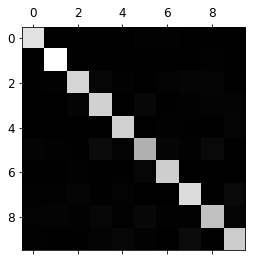

In [66]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)
plt.matshow(conf_mx, cmap=plt.cm.gray)

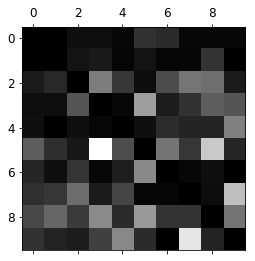

In [67]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)

In [ ]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)

In [72]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 0)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [73]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [75]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3, n_jobs=-1)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.9533959758906938

In [76]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [ ]:
some_index = 10
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])

In [ ]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)

In [82]:
from sklearn.dummy import DummyClassifier
dmy_clf = DummyClassifier()
y_probas_dmy = cross_val_predict(dmy_clf, X_train, y_train_6, cv=3, method="predict_proba")
y_scores_dmy = y_probas_dmy[:, 1]

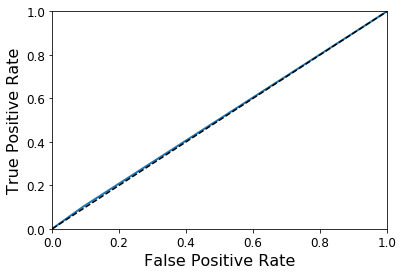

In [83]:
fprr, tprr, thresholdsr = roc_curve(y_train_6, y_scores_dmy)
plot_roc_curve(fprr, tprr)

In [84]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=4)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
                     weights='distance')

In [85]:
y_knn_pred = knn_clf.predict(X_test)

In [86]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_knn_pred)

0.9509090909090909

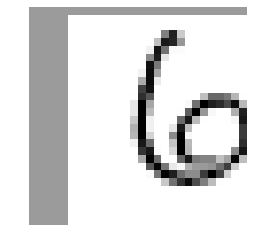

In [87]:
from scipy.ndimage.interpolation import shift
def shift_digit(digit_array, dx, dy, new=0):
    return shift(digit_array.reshape(28, 28), [dy, dx], cval=new).reshape(784)

plot_digit(shift_digit(some_digit, 5, 1, new=100))

In [88]:
X_train_expanded = [X_train]
y_train_expanded = [y_train]
for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    shifted_images = np.apply_along_axis(shift_digit, axis=1, arr=X_train, dx=dx, dy=dy)
    X_train_expanded.append(shifted_images)
    y_train_expanded.append(y_train)

X_train_expanded = np.concatenate(X_train_expanded)
y_train_expanded = np.concatenate(y_train_expanded)
X_train_expanded.shape, y_train_expanded.shape

((33500, 784), (33500,))

In [89]:
knn_clf.fit(X_train_expanded, y_train_expanded)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
                     weights='distance')

In [90]:
y_knn_expanded_pred = knn_clf.predict(X_test)

In [91]:
accuracy_score(y_test, y_knn_expanded_pred)

0.96

In [95]:
ambiguous_digit = X_test.iloc[333]
knn_clf.predict_proba([ambiguous_digit])

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]])

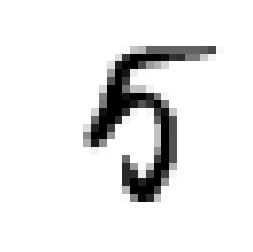

In [97]:
plot_digit(ambiguous_digit.values)